In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Helper Functions

In [2]:
# Function to read image.
def imread(img_path):
    img = cv2.imread(img_path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Function to tranform image from rgb to gray.
def rgb2gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Function to tranform image from rgb to binary.
def rgb2bin(img):
    img = rgb2gray(img)
    t, img_bin = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU|cv2.THRESH_BINARY_INV)
    return img_bin

# Function to show image.
def imshow(img, figsize=(10, 10)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap='gray')
    plt.show()

# Nested shapes

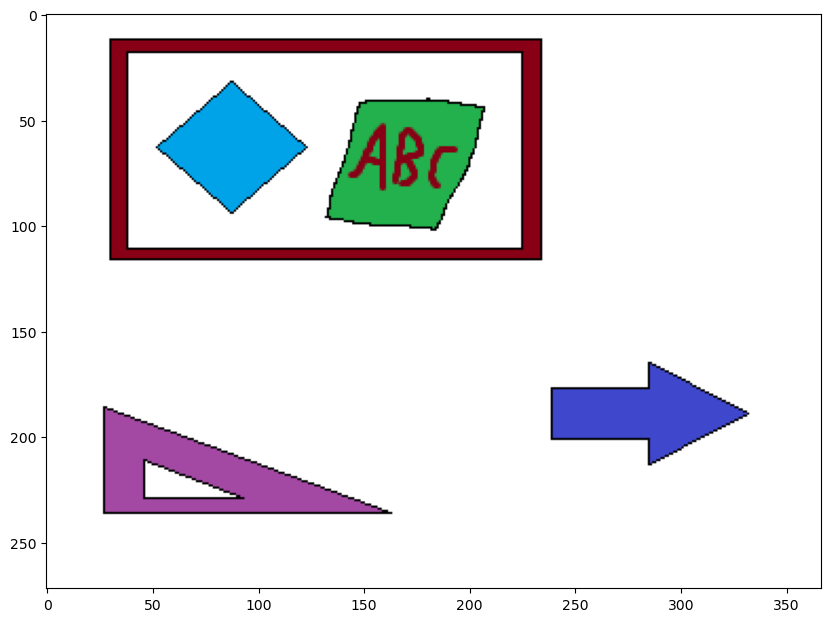

In [3]:
# Read the path of image.
img_shapes = imread('images/nested-shapes.png')

# Show the image.
imshow(img_shapes)

# Find contours
We must convert the image to binary first

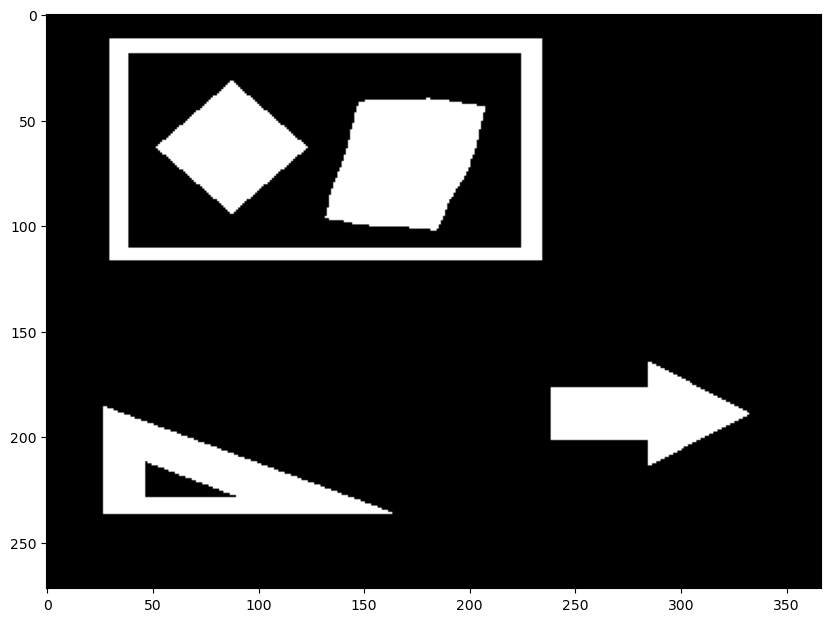

In [4]:
# Convert image to binary.
img_shapes_bin = rgb2bin(img_shapes)

# Show binary image.
imshow(img_shapes_bin)

In [5]:
# Find the conturs in the image.
contours, hierarchy = cv2.findContours(
    img_shapes_bin,
    cv2.RETR_TREE,    
    cv2.CHAIN_APPROX_SIMPLE
)

In [6]:
# Show the type of image.
print(type(contours))

# Show number of contours.
len(contours)

<class 'tuple'>


7

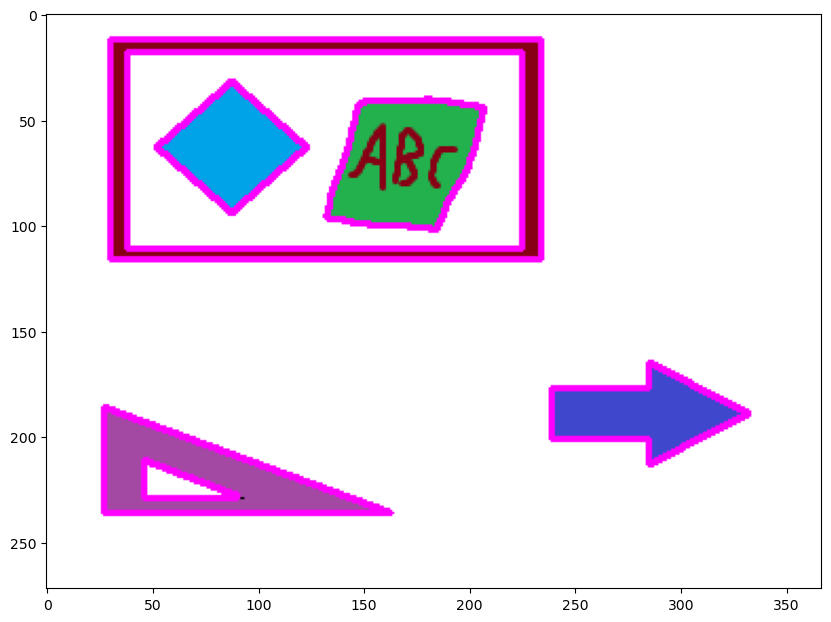

In [7]:
contours, hierarchy = cv2.findContours(img_shapes_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_copy = img_shapes.copy()
cv2.drawContours(img_copy, contours, -1, (255, 0, 255), 2)
imshow(img_copy)

In [8]:
# (area, , (x, y))
contours[4].shape

(8, 1, 2)

In [9]:
# If need tuple two dimention not 3D.
contours[4].squeeze().shape

(8, 2)

In [10]:
hierarchy

array([[[ 2, -1,  1, -1],
        [-1, -1, -1,  0],
        [ 3,  0, -1, -1],
        [-1,  2,  4, -1],
        [-1, -1,  5,  3],
        [ 6, -1, -1,  4],
        [-1,  5, -1,  4]]], dtype=int32)

# Bounding rect

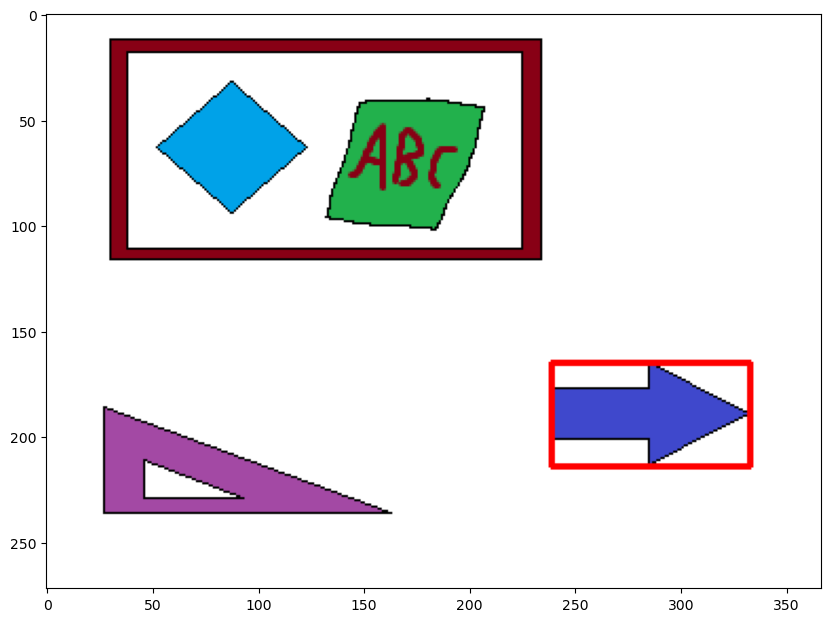

In [11]:
(x, y, w, h) = cv2.boundingRect(contours[2])

img_copy = img_shapes.copy()
cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 0, 0), 2)
imshow(img_copy)

# sorting contours by area

In [12]:
cv2.contourArea(contours[4])

17389.0

In [13]:
sortedContours = sorted(contours, key = cv2.contourArea, reverse = True)
largestContour = sortedContours[0]

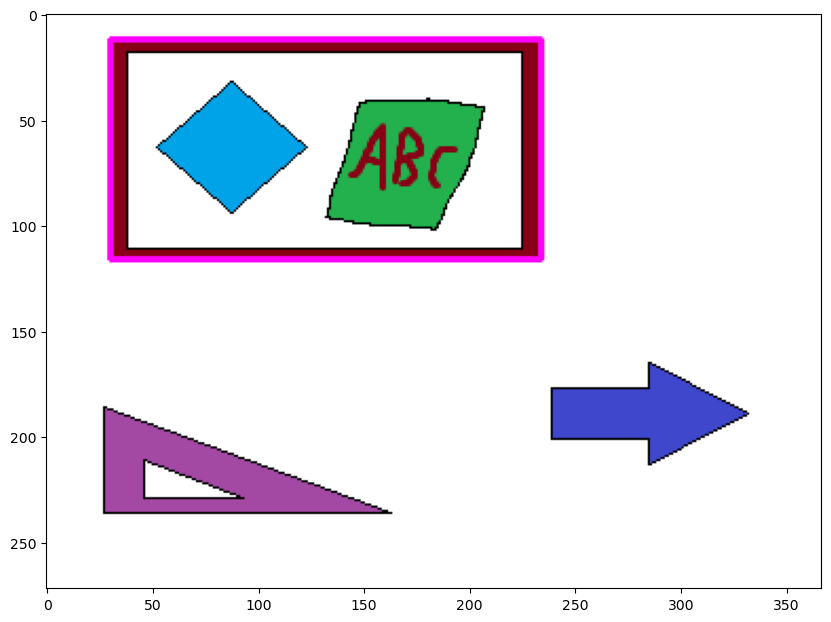

In [14]:
img_copy = img_shapes.copy()
cv2.drawContours(img_copy, [largestContour], 0, (255, 0, 255), 2)
imshow(img_copy)

# Approximating contours

98
4


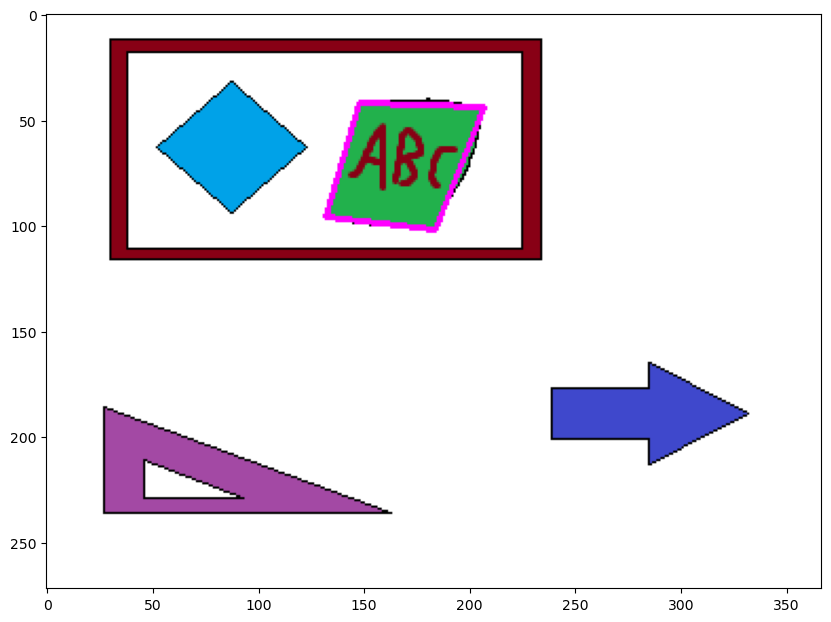

In [15]:
# Calculate the ocean of shapes.
length = cv2.arcLength(contours[5], True)  # If shape closed be True neither be False.
approx = cv2.approxPolyDP(contours[5], 0.02 * length, True) 

# Show the lenght of contours before and after approximating.
print(len(contours[5]))     # Before Approximating.
print(len(approx))          # After Approximating.

img_copy = img_shapes.copy()
cv2.drawContours(img_copy, [approx], 0, (255, 0, 255), 2)
imshow(img_copy)

# Perspective Transform

In [16]:
def order_points(pts):
    rect = np.zeros((4, 2), dtype = "float32")
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect

In [17]:
def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    pts = pts.reshape(4, 2)
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")
    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    # return the warped image
    return warped

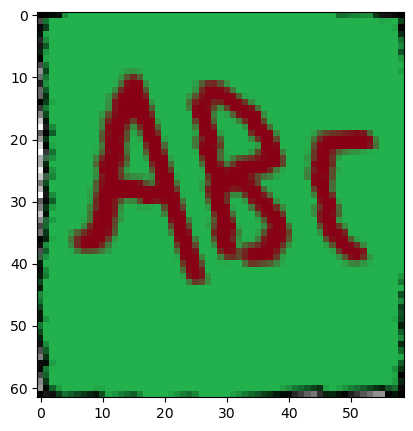

In [19]:
img2 = four_point_transform(img_shapes, approx)

imshow(img2, figsize =(5, 5))

# Bubble sheet example

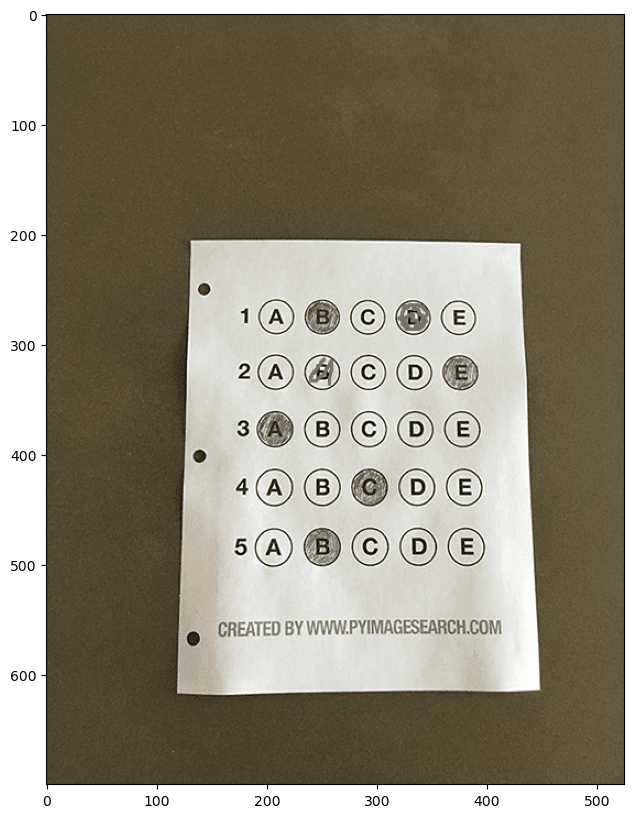

In [20]:
img = imread('images/example2.png')

imshow(img)

# Edge detection

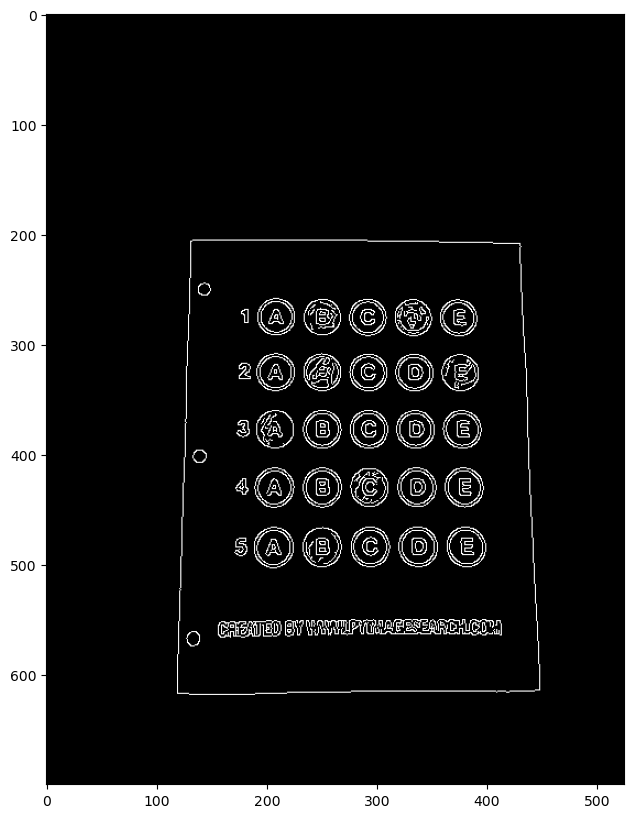

In [21]:
# Make Blurring to image.
blur = cv2.GaussianBlur(img, (5, 5), 0)

# Detect the edges from the image.
edges = cv2.Canny(blur, 75, 200)

# Show the image before detection.
imshow(edges)

# Finding sheet contours

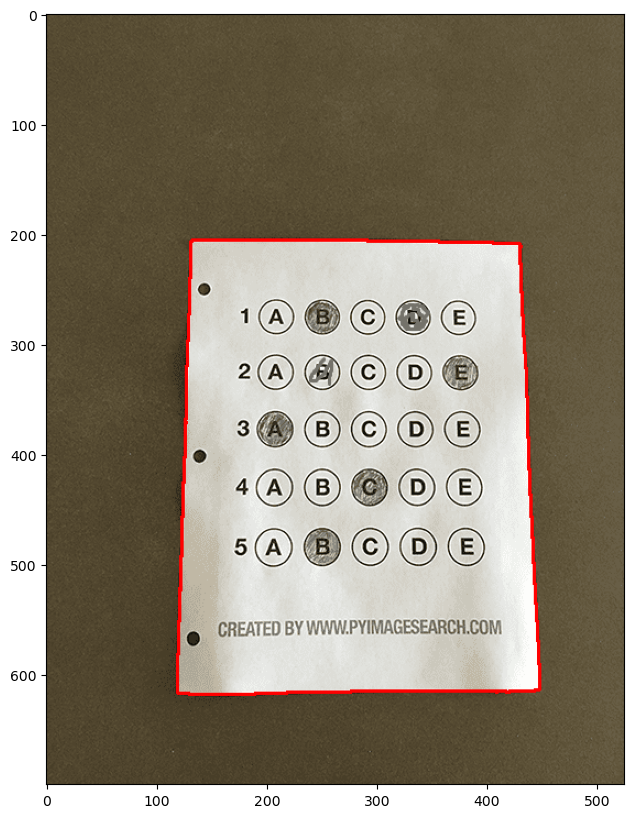

In [22]:
# find contours
contours, rel = cv2.findContours(
    edges,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

# draw contours
img_copy = img.copy()
cv2.drawContours(img_copy, contours, -1, (255, 0, 0), 2)
imshow(img_copy)

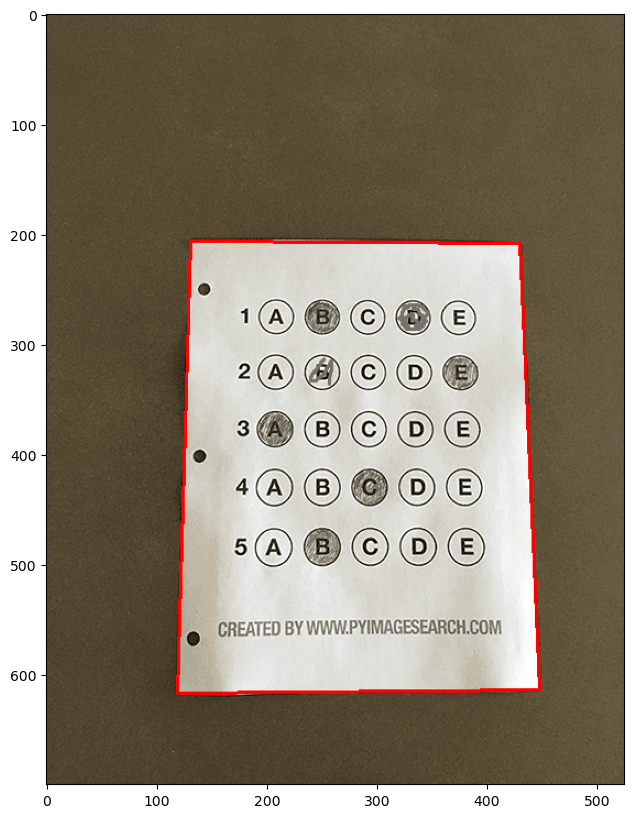

In [25]:
contours = sorted(
    contours, key = cv2.contourArea,
    reverse = True
)

sheetContour = None
for c in contours:
    length = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.01 * length, True)
    if len(approx) == 4:
        sheetContour = approx
        break
        
# draw contours
img_copy = img.copy()
cv2.drawContours(img_copy, [sheetContour], 0, (255, 0, 0), 2)
imshow(img_copy)

# Perspective transform for sheet

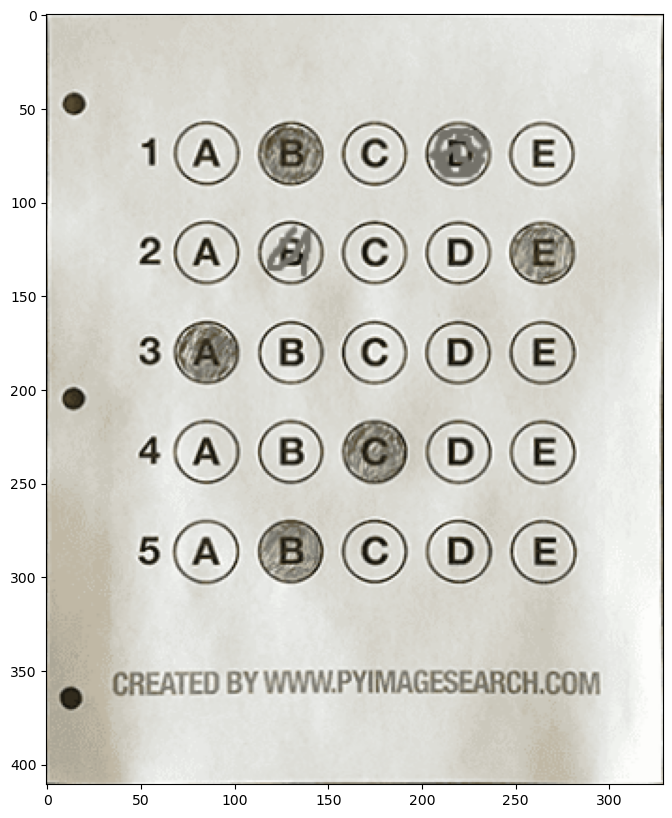

In [26]:
# Detect the only paper of answer from image.
sheet = four_point_transform(img, sheetContour)

# Show the image.
imshow(sheet)

# Finding bubble contours

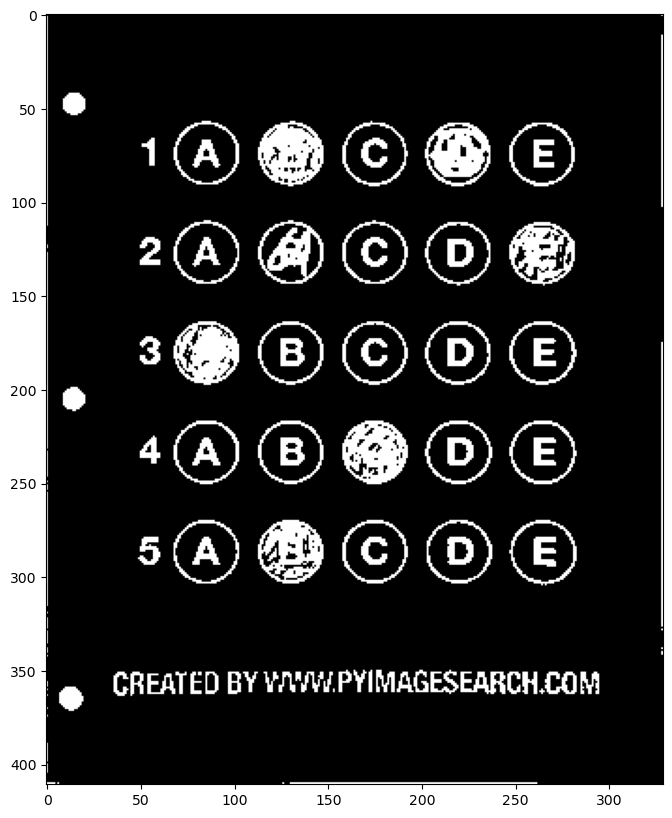

In [27]:
# Transform image to binary.
sheet_bin = rgb2bin(sheet)

# Show the image.
imshow(sheet_bin)

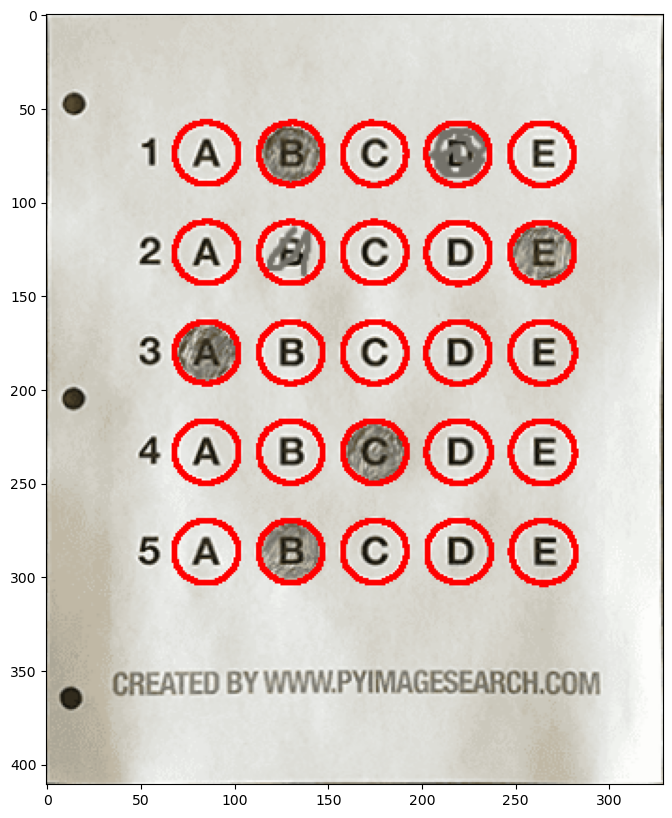

In [28]:
contours, hierarchy = cv2.findContours(
    sheet_bin, cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

bubbleContours = []

for c in contours:
    (x, y, w, h) = cv2.boundingRect(c)
    if w >= 20 and w <= 50 and h >= 20 and h <= 50:
        bubbleContours.append(c)
        
# draw contours.
img_copy = sheet.copy()
cv2.drawContours(img_copy, bubbleContours, -1, (255, 0, 0), 2)
imshow(img_copy)

# Sorting bubbles in a grid

In [29]:
def contourY(contour):
    (x, y, w, h) = cv2.boundingRect(contour)
    return y

def contourX(contour):
    (x, y, w, h) = cv2.boundingRect(contour)
    return x

In [30]:
bubbleContours = sorted(bubbleContours, key = contourY)

nCols = 5
grid = []

for i in range(0, len(bubbleContours), nCols):
    sortedRow = sorted(bubbleContours[i:i+nCols], key=contourX)
    grid.append([])
    for c in sortedRow:
        (x, y, w, h) = cv2.boundingRect(c)
        subImg = sheet[y:y+h, x:x+w]
        grid[-1].append(subImg)


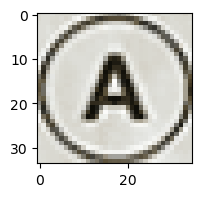

In [31]:
imshow(grid[1][0], figsize=(2, 2))

# Check if a bubble is marked

In [32]:
def isMarked(bubbleImg, threshold=0.4):
    bubbleImgBin = rgb2bin(bubbleImg)
    whiteArea = cv2.countNonZero(bubbleImgBin)
    totalArea = bubbleImg.shape[0] * bubbleImg.shape[1]
    ratio = whiteArea/totalArea
    return ratio >= threshold

In [33]:
isMarked(grid[0][1])

True

# Detecting answers 

In [34]:
nQuestions = len(grid)
nChoices = len(grid[0])
labels = ['A', 'B', 'C', 'D', 'E']

for q in range(nQuestions):
    print('Question', q+1)
    for choice in range(nChoices):
        bubbleImg = grid[q][choice]
        if isMarked(bubbleImg, threshold=0.4):
            lbl = labels[choice]
            print(' ', lbl, end='')
    print()

Question 1
  B  D
Question 2
  B  E
Question 3
  A
Question 4
  C
Question 5
  B
